In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer


warnings.filterwarnings('ignore')

import mysql.connector

In [2]:
#Connecting with MySQL

con = mysql.connector.connect(
    host="localhost",
    port=3306,
    user = "root",
    password="root1234",
    database = "machine_learning_project"
)

#Fetching data from table along with Age

sqldata = pd.read_sql_query("SELECT Name,Gender,DOB, TIMESTAMPDIFF(YEAR, DOB, CURDATE()) AS Age, Maths, Physics, Chemistry, English, Biology, Economics, History, Civics FROM student_marks",con)
sqldata
sqldata.head(10)

,Name,Gender,DOB,Age,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,Annu,F,1988-04-05,32,45,87,52,89,55,89,87,52
1,Farha,F,1990-08-12,29,55,63,89,75,78,75,63,89
2,Jennifer,F,1989-09-02,30,58,96,78,46,96,77,83,53
3,Jessica,F,1990-08-12,29,78,96,86,63,54,89,75,45
4,John,M,1988-04-05,32,55,45,56,87,21,52,89,65
5,Mukesh,M,1989-09-02,30,96,46,77,83,58,83,46,77
6,pooja,F,1987-05-04,33,55,64,61,58,75,58,64,61
7,Ramesh,M,1989-05-25,30,25,54,89,76,95,87,56,74
8,Ritesh,M,1989-05-25,30,54,76,87,56,25,56,76,87
9,Suresh,M,1987-05-04,33,75,96,78,64,90,61,58,2


In [3]:
#Checking null values

sqldata.isnull().sum()

Name         0
Gender       0
DOB          0
Age          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [4]:
#checking data type

sqldata.dtypes

Name         object
Gender       object
DOB          object
Age           int64
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [5]:
#creating a list for all subjects

marks_columns = ['Maths', 'Physics', 'Chemistry', 'English','Biology', 'Economics', 'History', 'Civics']

In [6]:
#Finding the Highest scorer in each subject

for col in marks_columns:
    column = sqldata[col]
    max_marks = max(column) #getting max marks in each subject
    print('Max marks in', col, '=',max_marks)
    
    #for getting name of student 
    i= 0
    for j in column:
        if max_marks == j:
            name = sqldata['Name'][i]
            print('Scored By :' ,name)
            
        i = i+1
    print()

Max marks in Maths = 96
Scored By : Mukesh

Max marks in Physics = 96
Scored By : Jennifer
Scored By : Jessica
Scored By : Suresh

Max marks in Chemistry = 89
Scored By : Farha
Scored By : Ramesh

Max marks in English = 89
Scored By : Annu

Max marks in Biology = 96
Scored By : Jennifer

Max marks in Economics = 89
Scored By : Annu
Scored By : Jessica

Max marks in History = 89
Scored By : John

Max marks in Civics = 89
Scored By : Farha



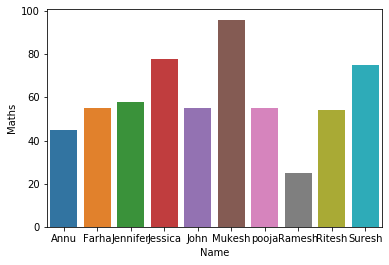

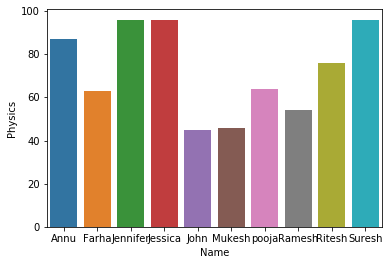

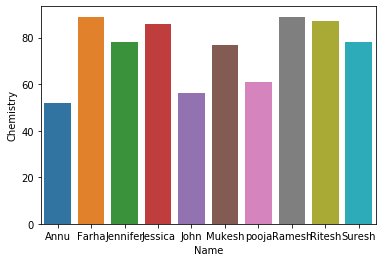

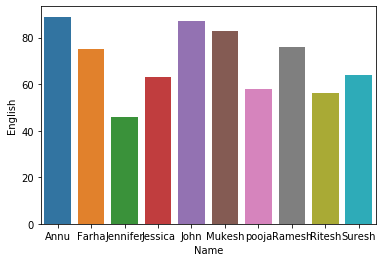

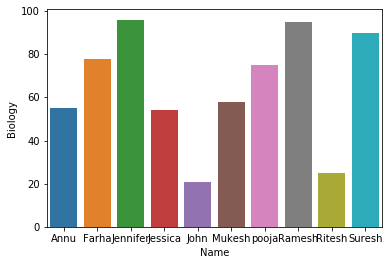

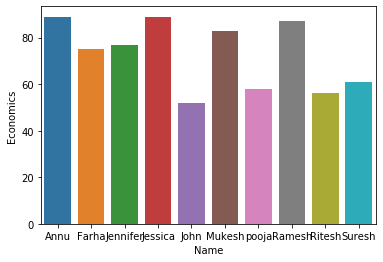

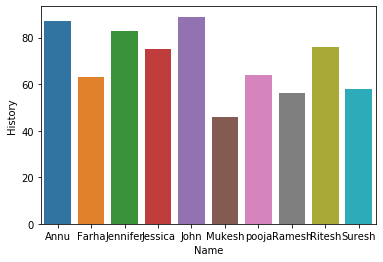

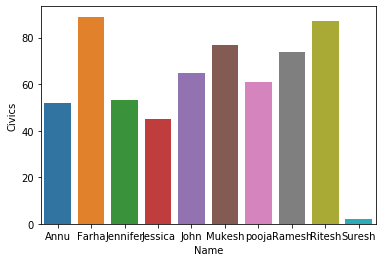

In [7]:
#Representing max marks with respect to subject graphically
for col in marks_columns:
    sns.barplot(x=sqldata["Name"],y=sqldata[col],data=sqldata)
    plt.show()

Performance analysis for  Maths


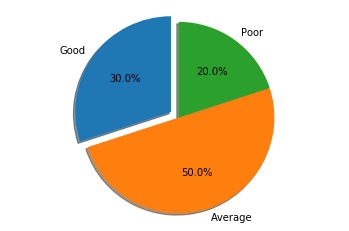

30 % of student i.e. 3 Students has performed good in  Maths
50 % of student i.e. 5 Students has performed average in  Maths
20 % of student i.e. 2 Students has performed poor in  Maths

--------------------------------------------------------------------------
Performance analysis for  Physics


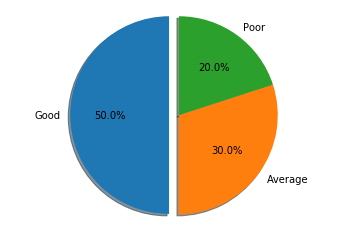

50 % of student i.e. 5 Students has performed good in  Physics
30 % of student i.e. 3 Students has performed average in  Physics
20 % of student i.e. 2 Students has performed poor in  Physics

--------------------------------------------------------------------------
Performance analysis for  Chemistry


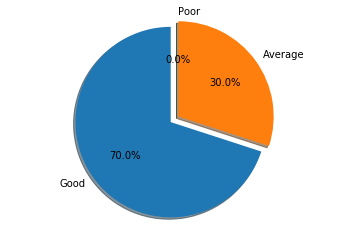

70 % of student i.e. 7 Students has performed good in  Chemistry
30 % of student i.e. 3 Students has performed average in  Chemistry
0 % of student i.e. 0 Students has performed poor in  Chemistry

--------------------------------------------------------------------------
Performance analysis for  English


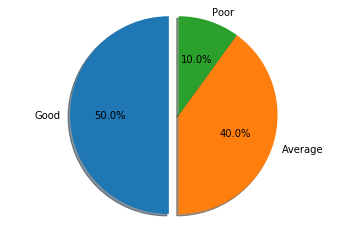

50 % of student i.e. 5 Students has performed good in  English
40 % of student i.e. 4 Students has performed average in  English
10 % of student i.e. 1 Students has performed poor in  English

--------------------------------------------------------------------------
Performance analysis for  Biology


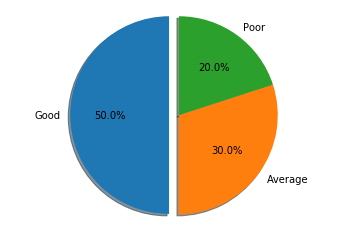

50 % of student i.e. 5 Students has performed good in  Biology
30 % of student i.e. 3 Students has performed average in  Biology
20 % of student i.e. 2 Students has performed poor in  Biology

--------------------------------------------------------------------------
Performance analysis for  Economics


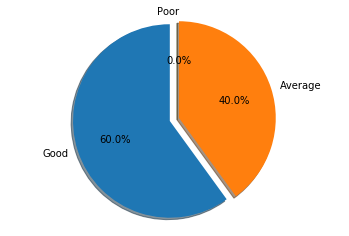

60 % of student i.e. 6 Students has performed good in  Economics
40 % of student i.e. 4 Students has performed average in  Economics
0 % of student i.e. 0 Students has performed poor in  Economics

--------------------------------------------------------------------------
Performance analysis for  History


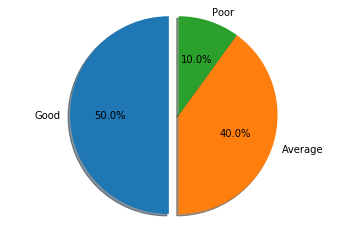

50 % of student i.e. 5 Students has performed good in  History
40 % of student i.e. 4 Students has performed average in  History
10 % of student i.e. 1 Students has performed poor in  History

--------------------------------------------------------------------------
Performance analysis for  Civics


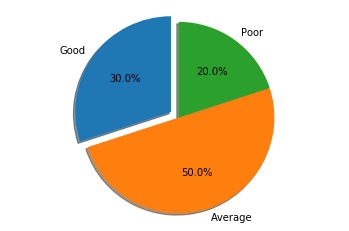

30 % of student i.e. 3 Students has performed good in  Civics
50 % of student i.e. 5 Students has performed average in  Civics
20 % of student i.e. 2 Students has performed poor in  Civics

--------------------------------------------------------------------------


In [8]:
#finding the performance of the student with respect to subject i.e. average, good, poor
#marks above 75 will be consider as good
#marks between 50 to 74 will be consider as average
#marks below 50 will be consider as poor

def percentage(a,b):
    c = (a/b)*100
    return round(c)


#marks_columns = ['Maths']
for col in marks_columns:
    column = sqldata[col]
    
    print('Performance analysis for ',col)
    
    average = 0
    good = 0
    poor = 0
    
    length = len(column)
    for marks in column:
        
        if marks >= 75:
            good = good+1
        elif marks >= 50 and marks <= 74:
            average = average+1
        else:
            poor = poor+1
          
    goodper = percentage(good,length)
    averageper = percentage(average,length)
    poorper = percentage(poor,length)   
    
    # Pie chart
    labels = 'Good', 'Average', 'Poor'
    sizes = [goodper, averageper, poorper]
    explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    
    print(goodper, '% of student i.e.', good, 'Students has performed good in ', col)
    print(averageper, '% of student i.e.', average, 'Students has performed average in ', col)
    print(poorper, '% of student i.e.', poor, 'Students has performed poor in ', col)
    print()
    print('--------------------------------------------------------------------------')



In [9]:
#Add total marks for all student
#Adding new column name as Total Marks

Total=0
for col in marks_columns:
    Total=Total+sqldata[col]
    
sqldata['Total'] = Total

In [10]:
sqldata

,Name,Gender,DOB,Age,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total
0,Annu,F,1988-04-05,32,45,87,52,89,55,89,87,52,556
1,Farha,F,1990-08-12,29,55,63,89,75,78,75,63,89,587
2,Jennifer,F,1989-09-02,30,58,96,78,46,96,77,83,53,587
3,Jessica,F,1990-08-12,29,78,96,86,63,54,89,75,45,586
4,John,M,1988-04-05,32,55,45,56,87,21,52,89,65,470
5,Mukesh,M,1989-09-02,30,96,46,77,83,58,83,46,77,566
6,pooja,F,1987-05-04,33,55,64,61,58,75,58,64,61,496
7,Ramesh,M,1989-05-25,30,25,54,89,76,95,87,56,74,556
8,Ritesh,M,1989-05-25,30,54,76,87,56,25,56,76,87,517
9,Suresh,M,1987-05-04,33,75,96,78,64,90,61,58,2,524


In [11]:
#Pushing 'Total' column in list

marks_columns.append('Total')
marks_columns

['Maths',
 'Physics',
 'Chemistry',
 'English',
 'Biology',
 'Economics',
 'History',
 'Civics',
 'Total']

Checking who has performed well in Maths
Male has performed well in  Maths
Total score of male in Maths is 291


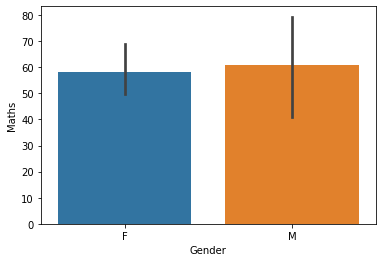


Checking who has performed well in Physics
Female has performed well in  Physics
Total score of female in Physics is 406


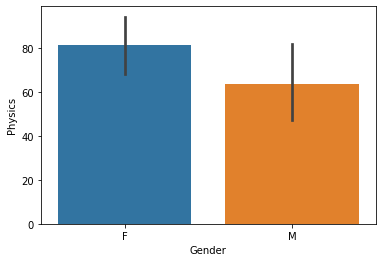


Checking who has performed well in Chemistry
Male has performed well in  Chemistry
Total score of male in Chemistry is 366


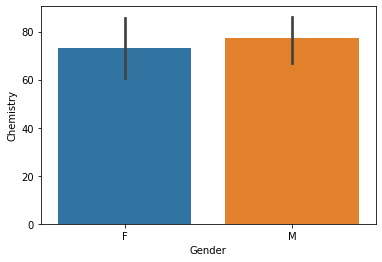


Checking who has performed well in English
Male has performed well in  English
Total score of male in English is 331


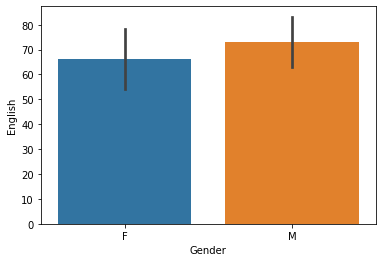


Checking who has performed well in Biology
Female has performed well in  Biology
Total score of female in Biology is 358


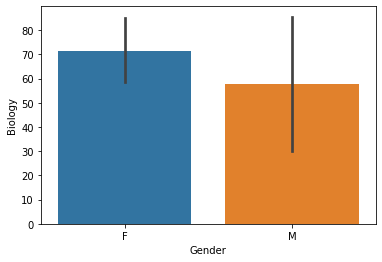


Checking who has performed well in Economics
Female has performed well in  Economics
Total score of female in Economics is 388


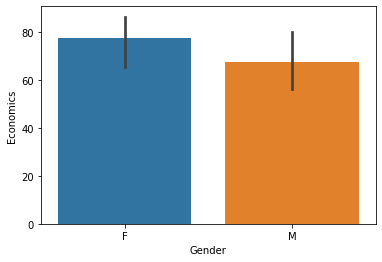


Checking who has performed well in History
Female has performed well in  History
Total score of female in History is 372


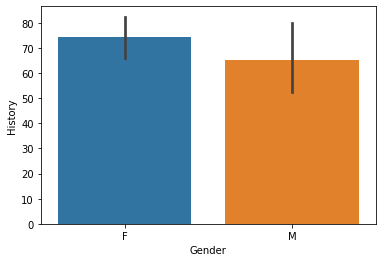


Checking who has performed well in Civics
Male has performed well in  Civics
Total score of male in Civics is 300


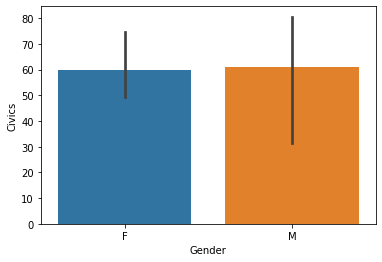


Checking who has performed well in Total
Female has performed well in  Total
Total score of female in Total is 2812


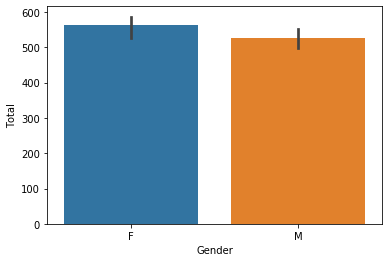

In [12]:
#From the above data we will conclude who has done well with respect to gender

for col in marks_columns:
    print('Checking who has performed well in', col)
    male = sum(sqldata[sqldata['Gender']=='M'][col])
    female = sum(sqldata[sqldata['Gender']=='F'][col])
    
    if male > female:
        print('Male has performed well in ', col)
        print('Total score of male in', col, 'is', female)
    else:
        print('Female has performed well in ', col)
        print('Total score of female in', col, 'is', female)
        
    sns.barplot(x=sqldata["Gender"],y=sqldata[col])
    plt.show()
    
    print()

In [13]:

sum(sqldata[sqldata['Name']=='Mukesh']['Maths'])

96

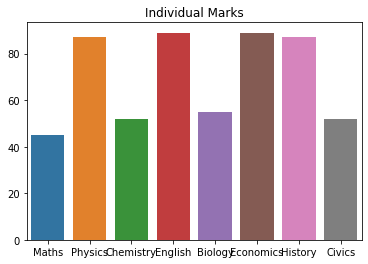

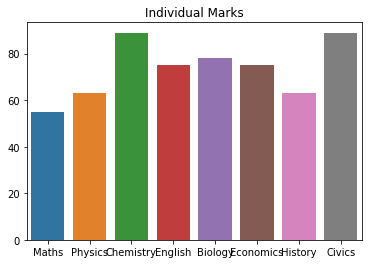

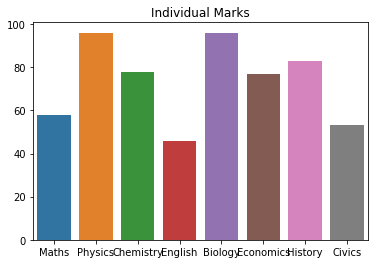

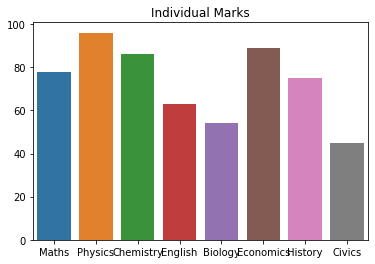

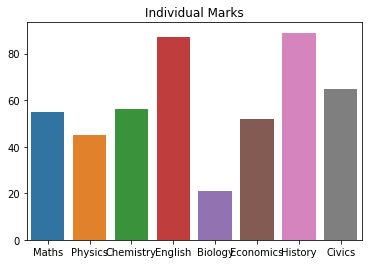

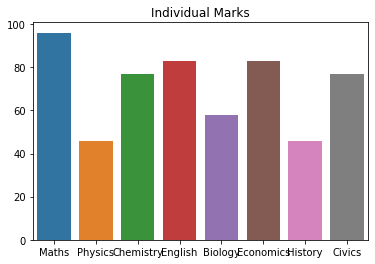

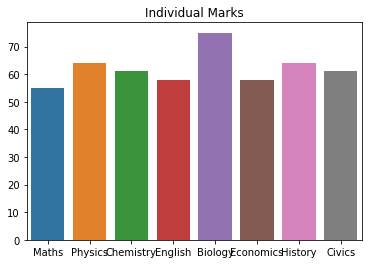

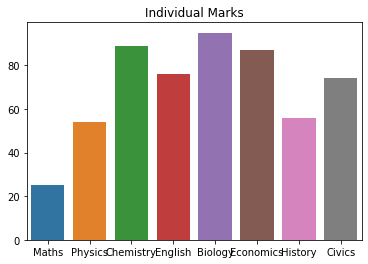

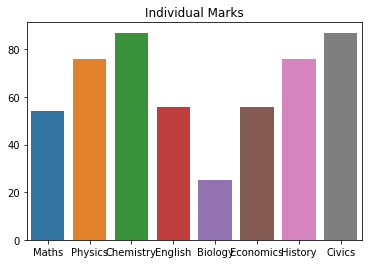

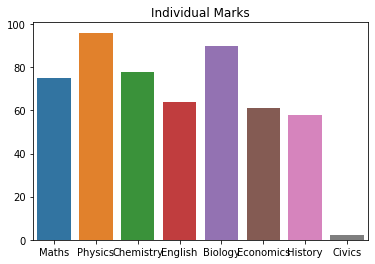

In [14]:
for name in sqldata['Name']:
    listmarks = []
    for col in marks_columns[:-1]:
        marks = sum(sqldata[sqldata['Name']==name][col])
        listmarks.append(marks)
    
    sns.barplot(x=marks_columns[:-1],y=listmarks,)
    plt.title('Individual Marks')
    plt.show()
    #plotdata = pd.DataFrame({"Marks":listmarks},index=marks_columns[:-1])
    #plotdata.plot(kind="bar")

In [15]:
sqldata.describe()

,Age,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,30.800000,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000,544.50000
std,1.549193,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432,41.01558
min,29.000000,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000,470.00000
25%,30.000000,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500,518.75000
50%,30.000000,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000,556.00000
75%,32.000000,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500,581.00000
max,33.000000,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000,587.00000


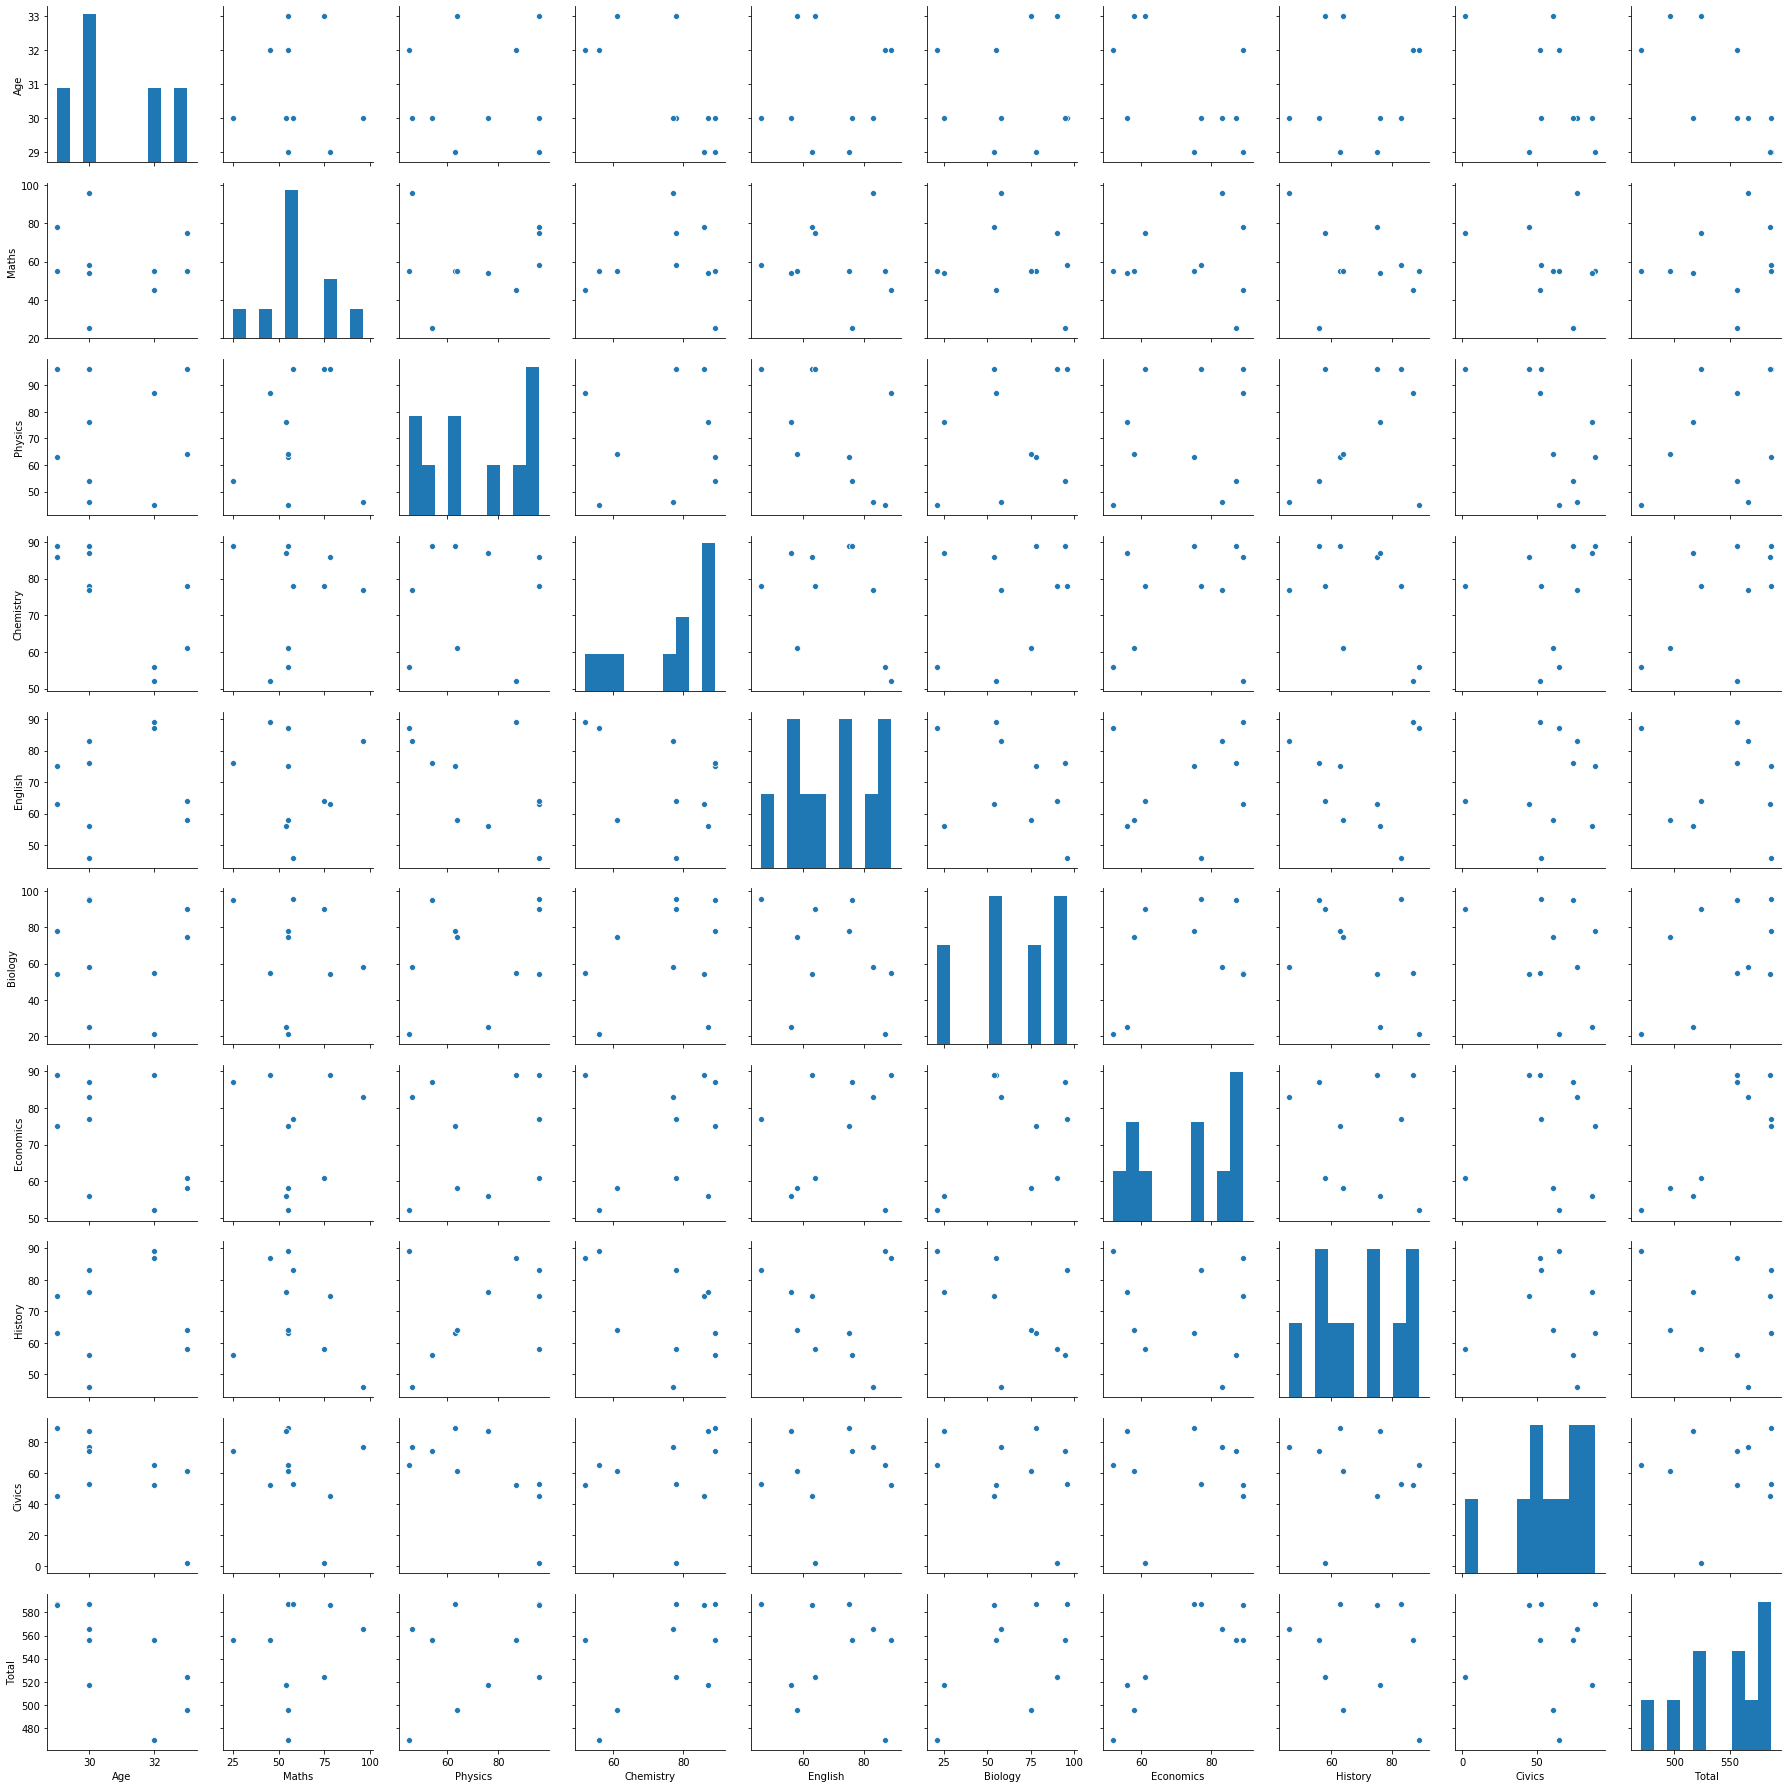

In [16]:
sns.pairplot(sqldata)

In [17]:
#Finding top 3 in the list
sqldata.sort_values(["Total"], axis=0, ascending=[False], inplace=True)

In [18]:
sqldata

,Name,Gender,DOB,Age,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total
1,Farha,F,1990-08-12,29,55,63,89,75,78,75,63,89,587
2,Jennifer,F,1989-09-02,30,58,96,78,46,96,77,83,53,587
3,Jessica,F,1990-08-12,29,78,96,86,63,54,89,75,45,586
5,Mukesh,M,1989-09-02,30,96,46,77,83,58,83,46,77,566
0,Annu,F,1988-04-05,32,45,87,52,89,55,89,87,52,556
7,Ramesh,M,1989-05-25,30,25,54,89,76,95,87,56,74,556
9,Suresh,M,1987-05-04,33,75,96,78,64,90,61,58,2,524
8,Ritesh,M,1989-05-25,30,54,76,87,56,25,56,76,87,517
6,pooja,F,1987-05-04,33,55,64,61,58,75,58,64,61,496
4,John,M,1988-04-05,32,55,45,56,87,21,52,89,65,470


In [19]:
sqldata.iloc[0:3,0:]

,Name,Gender,DOB,Age,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total
1,Farha,F,1990-08-12,29,55,63,89,75,78,75,63,89,587
2,Jennifer,F,1989-09-02,30,58,96,78,46,96,77,83,53,587
3,Jessica,F,1990-08-12,29,78,96,86,63,54,89,75,45,586


#Top three are female.
#from the above observation we can conclude that, female students has performed well.